# The Iris Data Set basics

## Introduction

Well known Iris Data set, one of the simplest data set for practicing machine learning. The data has only 150 rows & 4 columns. Lets dive more into i.

<b>Goal:</b>

1. Predict the class of the flower based on available attributes.

<b>Agenda:</b>

1. get the data and explore them to get an insight
2. clean and prepare your data
3. explore many different ML methods and chose the best one (or group of them)
4. fine-tune your model/s
5. present your solution -> skipped 
6. launch, monitor, and maintain your system - > skipped

So this is a rough outline of how the project will be developed. Final version could by slightly different.

## Data exploration 

Basic imports, others will be imported as needed.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

<i><b> Loading data...</b></i>

In [2]:
col_names = ["sepal length","sepal width", "petal length", "petal width", "label"] #all my columns
col_names_unlabeled = col_names[:-1] #without labels
col_names_labels = col_names[-1:] #only labels

In [3]:
iris_data = pd.read_csv("iris.data", names = col_names,
                       header = None, index_col = False)
iris_data.head()

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


So we have our data with labels. It's time to get the better insight, a  goal is simple, be able to predict whether the flower is Setosa, Versicolour or Virginica, based on the sepal and petal length and width. Firstly what is the difference beetween two of them (meaning sepal and petal).

![Loss](petal_vs_sepal.png)

There is a clear difference beetween petal and sepal just by looking, but we need to be able to classify them based on their width and length, but as we can see on first image the difference between width and length and how they correspond with our classification aren't so clear and vice versa the second image is easily recognized. Let's look at some charts.

![Loss](sepal_vs_petal2.jpg)

<i><b> Loading pairplot chart...</b></i>

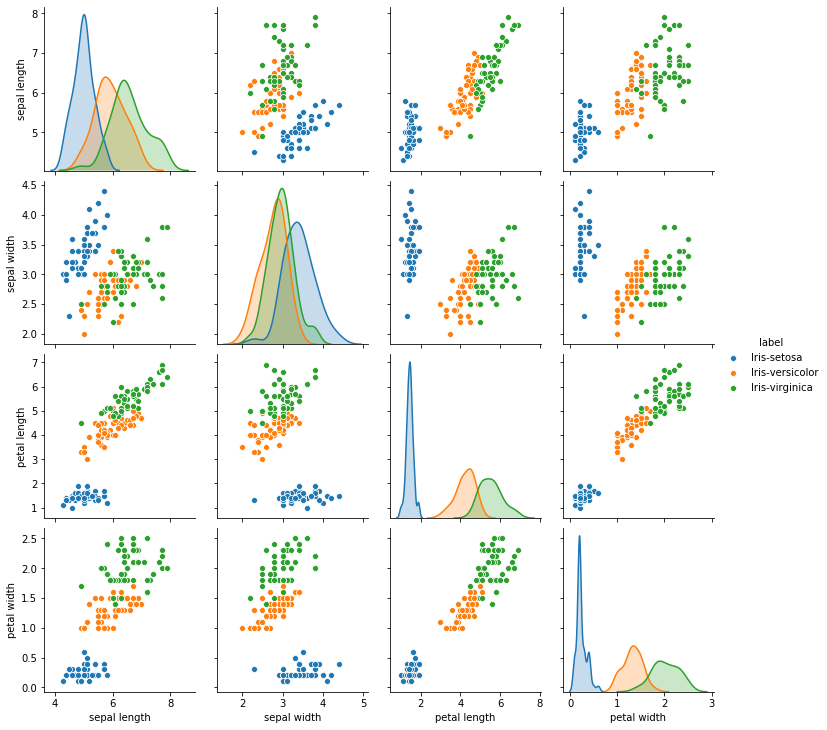

In [4]:
sns.pairplot(iris_data, hue="label")#hue for labels i guess it will be more explanatory

After first look, here are my observations:

- iris setosa is obviously an easy one :), i can easily say wheter it is or it is not an Iris-setosa just based on petal width and petal length
- sepal length x sepal width is useless (virginca x versicolor)
- but there is clearly a soft margin which we will have to accept, to be able to predict most of the results. For example, petal length and petal width looks promising in differentiating virginca and versicolor but it won't be possible without some misclassification (obviously)

<i><b>Loading perason's correlation chart!...</b></i>

In [5]:
pearsoncorr = iris_data.corr(method='pearson')

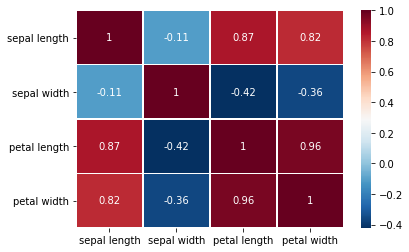

In [6]:
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

Honestly i have no idea how to interpret this chart, i mean it is easy to interpret, but i think there is nothing very useful. It is alwasy good to practice some plotting (definitely for me).

That is all I need for now. Let's prepare my data.

## Data cleaning and preparation

### Null Values

<b><i> Preparing data... </i></b>

In [7]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   label         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


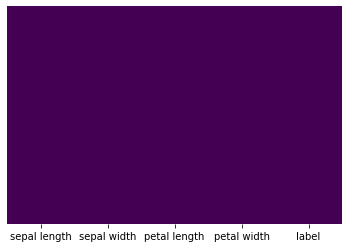

In [8]:
sns.heatmap(iris_data.isnull(),yticklabels=False,cbar=False, cmap='viridis')

We don't have any null values, and data types are okay (we could do some changes but what's the point). To make our model more future proof, i think it is necessary to create a pipeline, which will fill null values with mean or median values.

In [9]:
iris_data.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


It looks also okay, maybe pedal width is a bit unusual. I will perform Standardscaler anyway. But now it would be irresponsible to miss an outlier check and other stuff, so baby steps first.<b> DUMB ALERT - all changes must be done only on train set<b>

### Train Test

***Creating train test...***

Just for my personal eductional purpose, here is a really basic function for split.

In [10]:
def split_train_test(data, test_ration = 0.2):
    shuffled_indices = np.random.permutation(len(data))
    #we need to shuffle our data test
    test_set_size = int(len(data)*test_ration)
    test_indices = shuffled_indices[:test_set_size]
    #test is from 0 - len(test_set_size) default 80%
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
#this is our function for train test split..

In [11]:
#train_set, test_set = split_train_test(iris_data)

But more effective is just use a scikit-learn. **Better to use StratifiedShuffleSplit**, labels are evenly distributed. Therefore we will automatically avoid sampling bias that way.

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

In [13]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state = 42)
#just ona single split nothing else, test_size 0,3 - really small dataset

In [14]:
for train_index, test_index in split.split(iris_data, iris_data["label"]):
    #["label"] will be fine no need to change it..
    train_set = iris_data.loc[train_index]
    test_set = iris_data.loc[test_index]
    #i am doing split from split 

In [15]:
train_set.groupby("label").size()

label
Iris-setosa        35
Iris-versicolor    35
Iris-virginica     35
dtype: int64

Ok no we have our own train and test set, with same label proportions.

**TIP: it's better start with this at the beginning - doing insight already on train set and therefore avoid "brain" bias**. Brain bias meaning: to see the whole set and do unconsciously actions which leads to better results.

#### Recreating function for splitting

My first approach is not very generic. So i will make a small function which will take care of basic splitting, I can then call it and have data available for my pipline.

In [16]:
def prepare_set(address, col_names, strat_label):
    """improt and split data"""
    #import part
    data_name = pd.read_csv(address, names = col_names,
                           header = None, index_col = False)
    
    #splitting part
    from sklearn.model_selection import StratifiedShuffleSplit
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state = 42)
    
    for train_index, test_index in split.split(data_name, data_name[strat_label]):
        train_set = data_name.loc[train_index]
        test_set = data_name.loc[test_index]
        #i am doing split from split 
    
    X_train_set = train_set.iloc[:,:4]
    y_train_set = train_set.iloc[:,-1:]
    X_test_set = test_set.iloc[:,:4]
    y_test_set = test_set.iloc[:,-1:]
    
    return X_train_set, y_train_set, X_test_set, y_test_set
    
 

In [17]:
col_names = ["sepal length","sepal width", "petal length", "petal width", "label"]
X_train_set, y_train_set, X_test_set, y_test_set = \
prepare_set(address = "iris.data", col_names = col_names, strat_label = "label" )

In [18]:
len(X_train_set), len(y_train_set), len(X_test_set), len(y_test_set)

(105, 105, 45, 45)

It is just to make my life a little easier. First caveat is that, it requiers to have the label at the end of my table, so it's not so generic but it's still better than nothing. I will improve this function in future :).

### Outliers 

We could try to plot them but I would like to make something more generic. So the best options is using an IQR equation for calculating outliers and look if we cand find some outliers which meets the conditions.

In [19]:
Q1 = train_set[:-1].quantile(0.25)
Q3 = train_set[:-1].quantile(0.75)
IQR = Q3 - Q1 #just calculating our IQR

In [20]:
IQR #just calculating our IQR margin 

sepal length    1.3
sepal width     0.5
petal length    3.5
petal width     1.6
dtype: float64

In [21]:
outliers = train_set[(train_set[:-1] < (Q1 - 1.5 * IQR)) | (train_set[:-1] > (Q3 + 1.5 * IQR))]

In [22]:
outliers.count()

sepal length    0
sepal width     4
petal length    0
petal width     0
label           0
dtype: int64

Our mask found out that there are 4 outliers based on sepal width. It could be a good idea to plot sepal width as a scatter lot to make sure that IQR metric evaluations make sense, at least from our view (using a common sense? - hmm hope is a dangerous thing :)).

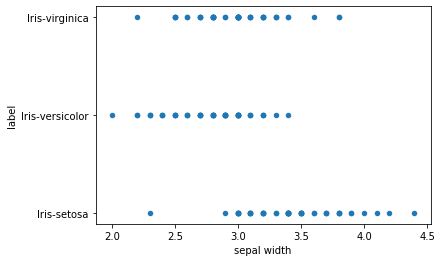

In [23]:
iris_data.plot.scatter('sepal width', 'label')

Ok i think we can clearly see that we have some outliers here. It would be best to replace them with median (I think from stastistical point of view it is a better solution). If i am trying to deal with outliers, using mean would be double fail cause they are more affected by outlier values. Ofcourse in this dataset it probably doesn't matter, hence it does :).

***A little recap about our data preparation.. ****

1. We don't have any null values - but we need to take care about them anyway (they can pop up in a new dataset)
2. Values are generally okay, but we will use standardscaler anyway (better for SVM)
3. We need to split data using StratifiedShuffleSplit - it's just better :)
4. Finally we have to care about outliers to replace them with median values (custom Transformer)

And that is all, after that our data are ready to go.

<b><i>So, my pipline ordering should looked like this:</i></b>

- replacing null values with median
- splitting data
- replacing outliers
- using standardscaller to scale our data

I am really not sure about this part hence the ordering or steps itself can be changed. I really have issue with ordering my pipline. From my point of view, null values are just the prior task, then i really have to split data cause i don't wanna scale or replace outliers on testing data because i could make my training data useless.

***Creating our custom transformer***

Let's create a custom classifier for replacing Outliers, for now only using an IQR metric.

In [24]:
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin

In [110]:
class OutlierDeleter(BaseEstimator, TransformerMixin):
    """Looking for outliers based on IQR outlier coefficient and replacing them"""
    
    def __init__(self, iqr_coef = 1.5):
        """1,5 is regulary used but i will leave that parameter to be an optional one"""
        self.iqr_coef = iqr_coef
    
    def fit(self, X, y=None):
        """mndatory method for transformer"""
        return self
        #no need to care about this one
        
    def transform(self, training_set): #very often is used X - but i like this one better :)
        """Method wich replace outlier with median values"""
        Q1 = training_set[:-1].quantile(0.25)
        Q3 = training_set[:-1].quantile(0.75)
        
        IQR = Q3 - Q1 #just calculating our IQR
        #Ok now we have calculated our Q1,Q3 and IQR so we can move on
        
        condition = training_set[(training_set[:-1] < (Q1 - 1.5 * IQR)) | (training_set[:-1] > (Q3 + 1.5 * IQR))]
        #my condition for replacing outliers - looking is based on IQR coefficient for outliers..
        
        training_set = training_set.replace(condition, np.nan)
        return training_set.values
        #need to use .values to transform from pandas to numpy array
        #simple imputer will take care of nan...

Ok so this custom transformer should done it's job. It will find outliers based on IQR and replace them with nan values.

### Final pipline

So now its time to pack everything together to have one simple pipeline which will do it's job. So our ordering is easy:

1. load data, shuffle and make stratified shuffle
2. detect outliers and change them to nan values
3. use imputer to fill nan values with median
4. use Standrdscaler to scale our data (probably not neede but why not?) 

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [27]:
col_names = ["sepal length","sepal width", "petal length", "petal width", "label"]
X_train_set, y_train_set, X_test_set, y_test_set = \
prepare_set(address = "iris.data", col_names = col_names, strat_label = "label" )

In [28]:
iris_pipline = Pipeline([
    ("OutlierDeleter", OutlierDeleter()),
    ("Imputer", SimpleImputer(strategy="median")),
    ("std_scaler", StandardScaler()),
])

In [29]:
iris_data = iris_pipline.fit_transform(X_train_set)

In [30]:
iris_data[:5]

array([[-0.90045861, -1.34280851, -0.44283471, -0.13515309],
       [ 0.38036614, -2.1104758 ,  0.40257701,  0.38088597],
       [-0.90045861,  1.98374977, -1.28824644, -1.1672312 ],
       [ 1.07899781,  0.44841518,  1.19162795,  1.41296408],
       [-0.20182693, -0.57514121,  0.17713389,  0.12286644]])

Our simple pipline seemed to be working just fine.

## ML - model exploration and hyperparameter tuning

### ML exploration

Final part, where i will try several models and choose the best one for hyperparameter tuning. Firstly some unnecessary imports.

In [31]:
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

So we will iterate through our classifiers and make some predictions. We can allow that, due to the small size of our samples. I could also try logistic regression (probably better for simplier model like this)....but i am really not focusing on result of my testing ..rather on processs

In [32]:
classifiers = [
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
    ]
#just a list with our classifiers

In [111]:
for classifier in classifiers:
    pipe = Pipeline(steps=[('iris_pipline', iris_pipline), #it just uses our pipline for data transformation
                      ('classifier', classifier)]) #and our list of classifiers
    pipe.fit(X_train_set, y_train_set.values.ravel()) #traning the model 
    y_pred = pipe.predict(X_test_set) #predict new values
    #and print results of our testing...
    print(f"{type(classifier)}\n")
    print(confusion_matrix(y_test_set, y_pred, labels=["Iris-setosa", "Iris-versicolor", "Iris-virginica"]))
    print(f"{precision_recall_fscore_support(y_test_set, y_pred, average='weighted')}\n")

<class 'sklearn.svm._classes.SVC'>

[[15  0  0]
 [ 0 13  2]
 [ 0  0 15]]
(0.9607843137254902, 0.9555555555555556, 0.9553571428571429, None)

<class 'sklearn.tree._classes.DecisionTreeClassifier'>

[[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]
(0.9607843137254902, 0.9555555555555556, 0.9553571428571429, None)

<class 'sklearn.ensemble._forest.RandomForestClassifier'>

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
(0.9791666666666666, 0.9777777777777777, 0.9777530589543938, None)

<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>

[[15  0  0]
 [ 0 15  0]
 [ 0  3 12]]
(0.9444444444444444, 0.9333333333333333, 0.9326599326599326, None)

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>

[[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]
(0.9607843137254902, 0.9555555555555556, 0.9553571428571429, None)



From our confusion matrices we can see, that our predictions don't have any trouble with differentiating Setosa from Versicolor and Virginica. Every model is 100% successful. But as i expected our rate of successful classification is decreasing when the model should classificate wheter it is a versicolor or virginica. For better results it could be a good idea to firstly seperate setosa from others and then make a slightly different model for virginica and versicolor (probably..).

### Tuning hyperparameter

Lastly, it's time for hyperparameter tuning. I will use pipeline for that as well.

In [74]:
from sklearn.model_selection import GridSearchCV

In [95]:
param_grid = { 
    'classifier__n_estimators': [100, 200],
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__max_depth' : [4,5,6,7,8,9,10],
    'classifier__criterion' :['gini', 'entropy'],
    'classifier__bootstrap': [True, False],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__min_samples_split': [2, 4, 6],
        }

In [96]:
my_tuning = Pipeline(steps=[(('iris_pipline', iris_pipline)),
                      ('classifier', RandomForestClassifier())])

In [97]:
CV = GridSearchCV(my_tuning, param_grid, n_jobs= 1)

In [98]:
CV.fit(X_train_set, y_train_set.values.ravel())  
print(CV.best_params_)    
print(CV.best_score_)

{'classifier__bootstrap': True, 'classifier__criterion': 'gini', 'classifier__max_depth': 8, 'classifier__max_features': 'auto', 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 6, 'classifier__n_estimators': 200}
0.9714285714285713


***Wait for it...*** 

Note: old i3 is really not a good CPU for this...It would be better doing this with ryzen. Why i am trying  to tune RandomForestClassifier? Well it had a really bad results in my previous testing, so i am very interesting how can it be improved with better hyperparameters.

In [99]:
forrest_final = Pipeline(steps=[('iris_pipline', iris_pipline),
                      ('classifier', RandomForestClassifier(
                      criterion = "gini",
                      max_depth = 8,
                      max_features = "auto",
                      n_estimators = 200,
                      min_samples_split = 6,
                      min_samples_leaf = 4))])

In [100]:
forrest_final.fit(X_train_set, y_train_set.values.ravel())

Pipeline(memory=None,
         steps=[('iris_pipline',
                 Pipeline(memory=None,
                          steps=[('OutlierDeleter',
                                  OutlierDeleter(iqr_coef=1.5)),
                                 ('Imputer',
                                  SimpleImputer(add_indicator=False, copy=True,
                                                fill_value=None,
                                                missing_values=nan,
                                                strategy='median', verbose=0)),
                                 ('std_scaler',
                                  StandardScaler(copy=True, with_mean=True,
                                                 with_std=True))],
                          verbose=False)),
                ('classifier',
                 RandomFor...p=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=8, max_

In [101]:
y_pred = forrest_final.predict(X_test_set)
print(confusion_matrix(y_test_set, y_pred, labels=["Iris-setosa", "Iris-versicolor", "Iris-virginica"]))
print(f"{precision_recall_fscore_support(y_test_set, y_pred, average='weighted')}\n")

[[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]
(0.9155354449472096, 0.9111111111111111, 0.9107142857142857, None)



Tuning our parameters make it slightly better, still randomforrest is not probably the best model for this data. It's too small and too simple for complicated algorithm.

### Withouth Standardscaler and with normalizer

Because our data looked scaled fairly well, i would like to try some "menchmarks :)" (i dunno if this is a regular term, if not..i just use it and will use it again cause it sounds great!) without standardscaler and also try to use normalizer and see the result.

#### StandardScaler off

In [102]:
col_names = ["sepal length","sepal width", "petal length", "petal width", "label"]
X_train_set, y_train_set, X_test_set, y_test_set = \
prepare_set(address = "iris.data", col_names = col_names, strat_label = "label" )

In [103]:
iris_pipline = Pipeline([
    ("OutlierDeleter", OutlierDeleter()),
    ("Imputer", SimpleImputer(strategy="median")),
    #("std_scaler", StandardScaler()),
])

In [104]:
for classifier in classifiers:
    pipe = Pipeline(steps=[('iris_pipline', iris_pipline), #it just uses our pipline for data transformation
                      ('classifier', classifier)]) #and our list of classifiers
    pipe.fit(X_train_set, y_train_set.values.ravel()) #traning the model 
    y_pred = pipe.predict(X_test_set)
    print(f"{type(classifier)}\n")
    print(confusion_matrix(y_test_set, y_pred, labels=["Iris-setosa", "Iris-versicolor", "Iris-virginica"]))
    print(f"{precision_recall_fscore_support(y_test_set, y_pred, average='weighted')}\n")

<class 'sklearn.svm._classes.SVC'>

[[15  0  0]
 [ 0 14  1]
 [ 0  4 11]]
(0.8981481481481481, 0.8888888888888888, 0.8877665544332211, None)

<class 'sklearn.tree._classes.DecisionTreeClassifier'>

[[15  0  0]
 [ 0 13  2]
 [ 0  2 13]]
(0.9111111111111111, 0.9111111111111111, 0.9111111111111111, None)

<class 'sklearn.ensemble._forest.RandomForestClassifier'>

[[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]
(0.9155354449472096, 0.9111111111111111, 0.9107142857142857, None)

<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>

[[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]
(0.9345238095238095, 0.9333333333333333, 0.9332591768631814, None)

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>

[[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]
(0.9345238095238095, 0.9333333333333333, 0.9332591768631814, None)



Okay nothing interesting here, SVC performed much worse but others are a slightly better.

#### Normalizer on

In [105]:
from sklearn.preprocessing import Normalizer

In [106]:
iris_pipline = Pipeline([
    ("OutlierDeleter", OutlierDeleter()),
    ("Imputer", SimpleImputer(strategy="median")),
    ("Normalizer", Normalizer()),
])

In [107]:
for classifier in classifiers:
    pipe = Pipeline(steps=[('iris_pipline', iris_pipline), #it just uses our pipline for data transformation
                      ('classifier', classifier)]) #and our list of classifiers
    pipe.fit(X_train_set, y_train_set.values.ravel()) #traning the model 
    y_pred = pipe.predict(X_test_set)
    print(f"{type(classifier)}\n")
    print(confusion_matrix(y_test_set, y_pred, labels=["Iris-setosa", "Iris-versicolor", "Iris-virginica"]))
    print(f"{precision_recall_fscore_support(y_test_set, y_pred, average='weighted')}\n")

<class 'sklearn.svm._classes.SVC'>

[[15  0  0]
 [ 0 13  2]
 [ 0  0 15]]
(0.9607843137254902, 0.9555555555555556, 0.9553571428571429, None)

<class 'sklearn.tree._classes.DecisionTreeClassifier'>

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
(0.9791666666666666, 0.9777777777777777, 0.9777530589543938, None)

<class 'sklearn.ensemble._forest.RandomForestClassifier'>

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
(0.9791666666666666, 0.9777777777777777, 0.9777530589543938, None)

<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>

[[15  0  0]
 [ 0 15  0]
 [ 0  3 12]]
(0.9444444444444444, 0.9333333333333333, 0.9326599326599326, None)

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>

[[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]
(0.9607843137254902, 0.9555555555555556, 0.9553571428571429, None)



Well that looks more promising. All of our test are perfoming much better with normalized values. Maybe because we take care of outliers by ourself (data_sets with outliers are probably better with standardscaler and vice versa). 

***The end***